# 自行车租赁数据分析

这一章节主要处理时间序列。

Series 直接 plot() 绘制的是折线图。

plot(kind='bar') 绘制的是柱形图。


In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd

bike = pd.read_csv('./bike.csv')
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


首先看看有没有缺失值。

In [4]:
# 各个字段没有缺失值
bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [4]:
# 发现 datetime 字段不是时间类型
bike.dtypes 

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## 把表示日期的那一列转换成时间类别

使用 Pandas 的内置函数 `pd.to_datetime` 。

In [5]:
# 利用 pd.to_datetime 把 datetime 字段转换成日期时间类型
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

### 然后把 datetime 字段设置成索引

+ 使用 `DataFrame` 的 `set_index` 方法设置索引，传入要成为索引的字段名称。

这样我们就可以通过日期索引到我们想要的数据。

In [6]:
# 把 datetime 字段设置成索引
bike = bike.set_index('datetime')
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
bike.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

In [19]:
# 查看末尾的几项
bike.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


## 降采样就是数量减少的采样

In [20]:
bike.iloc[0, :]

season         1.000
holiday        0.000
workingday     0.000
weather        1.000
temp           9.840
atemp         14.395
humidity      81.000
windspeed      0.000
casual         3.000
registered    13.000
count         16.000
Name: 2011-01-01 00:00:00, dtype: float64

## 索引是日期时间类型，可以根据年份分组

In [54]:
bike.groupby(lambda x:x.year).mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour
2011,2.511988,0.026558,0.682036,1.426411,19.751988,23.157086,63.405017,12.924144,28.73792,115.485430,144.223349,9.982663,11.571007
2012,2.501281,0.030564,0.679722,1.410505,20.706051,24.149254,60.379575,12.675605,43.25000,195.310944,238.560944,10.002379,11.512445


In [25]:
# 这里是一个技巧，直接传入 .year 就可以分组了，这是根据索引的 year 属性
bike.groupby(lambda x: x.year).mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2011,2.511988,0.026558,0.682036,1.426411,19.751988,23.157086,63.405017,12.924144,28.73792,115.485430,144.223349
2012,2.501281,0.030564,0.679722,1.410505,20.706051,24.149254,60.379575,12.675605,43.25000,195.310944,238.560944


In [29]:
bike.index.year # bike.index.day

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', name='datetime', length=10886)

In [34]:
# 降采样

# 根据
y_bike = bike.groupby(lambda x: x.year).mean()
y_bike['count']

2011    144.223349
2012    238.560944
Name: count, dtype: float64

### DataFrame 直接就可以绘制柱状图

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


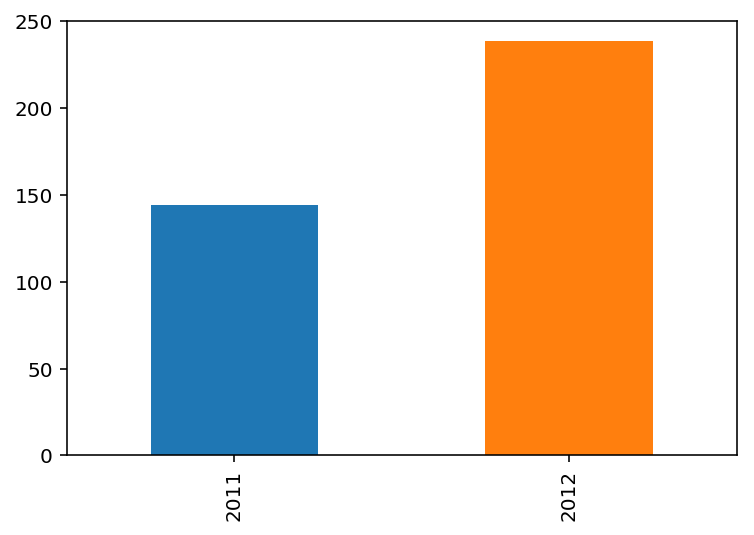

In [35]:
# 绘制柱状图
y_bike['count'].plot(kind='bar')
plt.show()

In [36]:
bike.shape

(10886, 11)

## resample 重采样

<span class="burk">从这里可以看出，降采样，要提供一个汇总函数。</span>


kind: {'timestamp', 'period'}, optional
    Pass 'timestamp' to convert the resulting index to a
    ``DateTimeIndex`` or 'period' to convert it to a ``PeriodIndex``.
    By default the input representation is retained.

In [40]:
# 重采样到月份，类型为时期类型
m_bike = bike.resample('M', kind='period').mean()
m_bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01,1.0,0.055684,0.612529,1.440835,8.633782,10.767981,56.308585,13.749830,4.658933,49.986079,54.645012
2011-02,1.0,0.000000,0.733184,1.378924,11.331076,13.999922,53.580717,15.509298,8.466368,65.174888,73.641256
2011-03,1.0,0.000000,0.735426,1.466368,14.063184,16.895594,55.923767,16.033866,17.735426,69.114350,86.849776
2011-04,2.0,0.052747,0.630769,1.619780,17.776879,21.239835,66.285714,15.844234,26.876923,84.149451,111.026374
2011-05,2.0,0.000000,0.736842,1.528509,21.528596,25.455143,71.421053,12.355358,34.791667,140.017544,174.809211
2011-06,2.0,0.000000,0.684211,1.278509,28.191096,32.150910,58.291667,11.930099,42.982456,153.894737,196.877193
2011-07,3.0,0.052632,0.631579,1.184211,29.967763,34.011656,60.403509,11.960793,57.335526,146.278509,203.614035
2011-08,3.0,0.000000,0.789474,1.344298,29.667456,33.461711,62.166667,12.480543,38.552632,144.114035,182.666667
2011-09,3.0,0.052980,0.629139,1.618102,25.141236,28.693256,74.830022,11.501445,40.421634,134.200883,174.622517


In [41]:
# 只有两年的数据，所以是 24 条数据
m_bike.shape

(24, 11)

### 绘制多图，使用 subplots

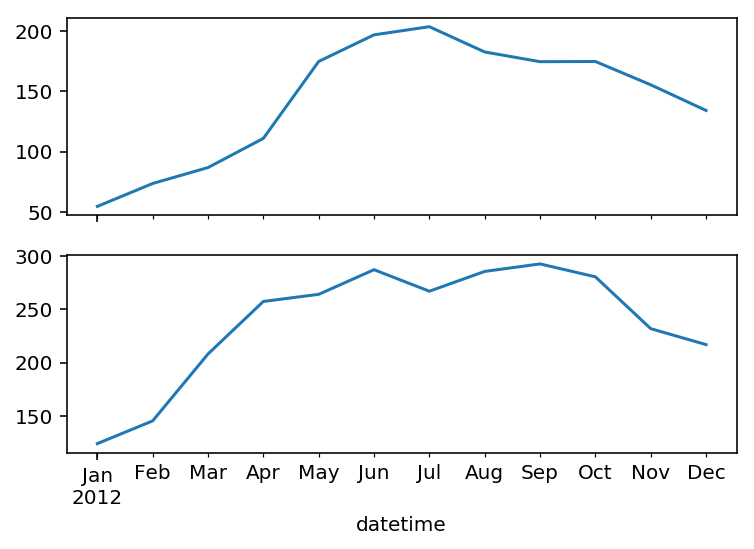

In [42]:
# 两行一列
fig, axes = plt.subplots(2, 1)  

m_bike['2011']['count'].plot(ax=axes[0], sharex=True)  # 共享 X 轴
m_bike['2012']['count'].plot(ax=axes[1])
plt.show()

In [45]:
# 新增 日期 和 小时 列
bike['day'] = bike.index.day
bike['hour'] = bike.index.hour
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


### day 和 hour 都是新抽取出来的特征

In [55]:
d_bike = bike.groupby('day')['count'].mean()
d_bike

day
1     180.333913
2     183.910995
3     194.696335
4     195.705575
5     189.765217
6     189.860140
7     183.773519
8     179.041812
9     187.897391
10    195.183566
11    195.679577
12    190.675393
13    194.160279
14    195.829268
15    201.527875
16    191.353659
17    205.660870
18    192.605684
19    192.311847
Name: count, dtype: float64

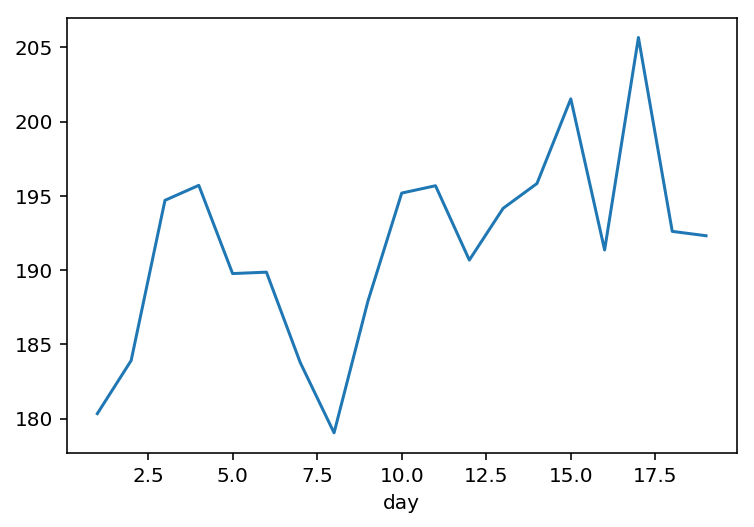

In [56]:
d_bike.plot()
plt.show()

In [57]:
h_bike = bike.groupby('hour')['count'].mean()
h_bike

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

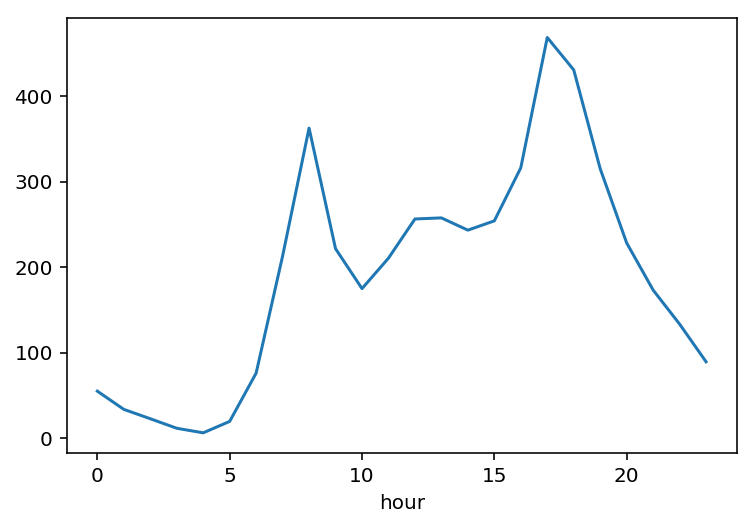

In [59]:
h_bike.plot()
plt.show()

In [61]:
work_bike = bike.groupby('workingday')['count'].mean()
work_bike

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

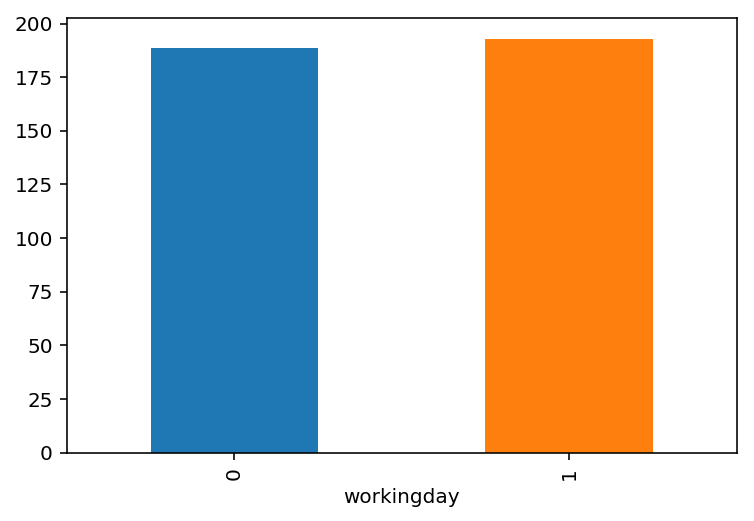

In [62]:
work_bike.plot(kind='bar')
plt.show()

In [65]:
weather_bike = bike.groupby('weather')['count'].mean()
weather_bike

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

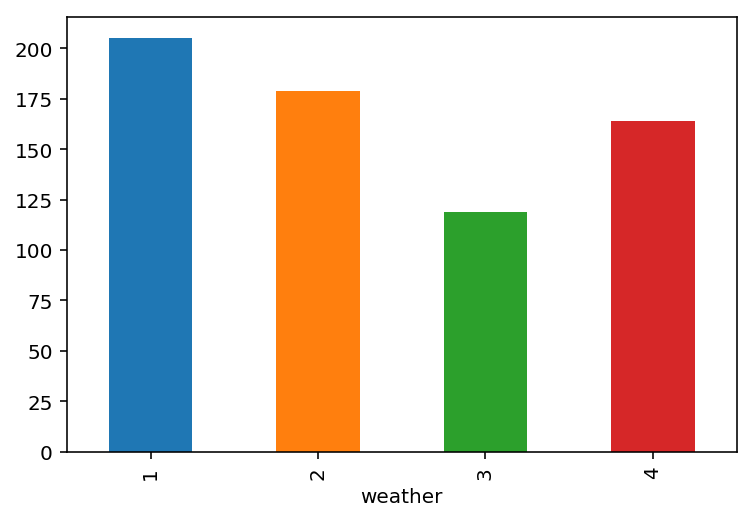

In [66]:
weather_bike.plot(kind='bar')
plt.show()